<a href="https://colab.research.google.com/github/MonkeyTable/AI_Literacy/blob/main/4%EA%B3%BC_%EB%B6%84%EC%84%9D%EB%AA%A8%ED%98%95_%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#지도학습 분류모델 평가지표

##오차(혼돈)행렬Confusion Matrix

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 예제 데이터: 실제 값(y_true)과 예측 값(y_pred)
y_true = np.array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0])
y_pred = np.array([0, 1, 0, 0, 0, 1, 1, 1, 0, 0])

# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

#평가지표 계산
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

In [ ]:
#평가지표 계산: 특이도, ROC Curve
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 예제 데이터: 실제 값(y_true)과 예측 확률(y_scores)
y_true = np.array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0])
y_scores = np.array([0.1, 0.9, 0.2, 0.4, 0.3, 0.8, 0.9, 0.6, 0.7, 0.2])

# 예측 레이블을 threshold 0.5로 이진화
y_pred = (y_scores >= 0.5).astype(int)

# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)

# True Negative, False Positive, False Negative, True Positive 추출
TN, FP, FN, TP = cm.ravel()

# Specificity 계산
specificity = TN / (TN + FP)
print(f'Specificity: {specificity:.2f}')

# ROC Curve 및 AUC 계산
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = roc_auc_score(y_true, y_scores)

# ROC Curve 그리기
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


### 혼동행렬 생성

- 파일 불러오기

In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

- 예제 데이터

In [16]:
 #예제 데이터: 실제 값(y_true)과 예측 값(y_pred)
y_true = np.array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0])
y_pred = np.array([0, 1, 0, 0, 0, 1, 1, 1, 0, 0])

- confusion matrix 생성

In [17]:
# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)
print(f"Confusion Matrix: {cm}")

Confusion Matrix: [[4 1]
 [2 3]]


- confusion matrix 시각화

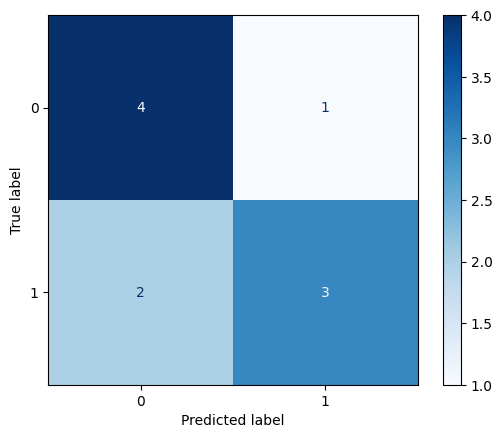

In [5]:
# Confusion Matrix 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### 평가지표 계산:
  - 정확도Accuracy: 실제 데이터와 예측 데이터 비교, accuracy=(TP+TN/TP+TN+FP+FN)
  - 정밀도Precision: positive 예측 중 실제 positive, precision=(TP/TP+FP)
  - 민감도(재현율,Recall): 실제 positive 중 정확한 positive 예측, recall=(TP/TP+FN)
  * 정밀도와 민감도(재현율)은 상충관계trade-off
  - F1-score: 정밀도, 재현율 결합한 조화평균, F1=2/((1/recall)+(1/precision))=2X(precision*recall/precision+recall)
  - 특이도Specificity: 실제 negative 중 정확한 negative 예측, TN/(TN+FP)
  - ROC(Reciver Operation Characteristic)곡선: FPR(1-특이도)가 변할 때 TPR(민감도)의 변화, FPR=FP/FP+TN, TPR=TP/TP+FN

In [18]:
#평가지표 계산: 정확도, 정밀도, 민감도, F1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Accuracy: 0.70
Precision: 0.75
Recall: 0.60
F1 Score: 0.67


### 특이도, ROC Curve, AUC

  - 함수 불러오기

In [19]:
#평가지표 계산: 특이도, ROC Curve
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

- 예제 데이터

In [20]:
#실제 값(y_true)과 예측 확률(y_scores)
y_true = np.array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0])
y_scores = np.array([0.1, 0.9, 0.2, 0.4, 0.3, 0.8, 0.9, 0.6, 0.7, 0.2])

# 예측 레이블 threshold 0.5로 이진화
y_pred = (y_scores >= 0.5).astype(int)

- Confusion Matrix 및 평가지수 산출

In [21]:
# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)

# True Negative, False Positive, False Negative, True Positive 추출
TN, FP, FN, TP = cm.ravel()
print(f'Confusion Matrix: {cm}')

Confusion Matrix: [[4 1]
 [1 4]]


- Specificity, ROC AUC 계산

In [22]:
# Specificity 계산
specificity = TN / (TN + FP)
print(f'Specificity: {specificity:.2f}')

Specificity: 0.80


- ROC Curve 및 AUC 계산

In [24]:
# ROC Curve 및 AUC 계산
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = roc_auc_score(y_true, y_scores)
print(f'FRP:{fpr}')
print(f'TPR:{tpr}')

FRP:[0.  0.  0.  0.2 0.2 0.4 0.8 1. ]
TPR:[0.  0.4 0.8 0.8 1.  1.  1.  1. ]


- ROC Curve 그리기

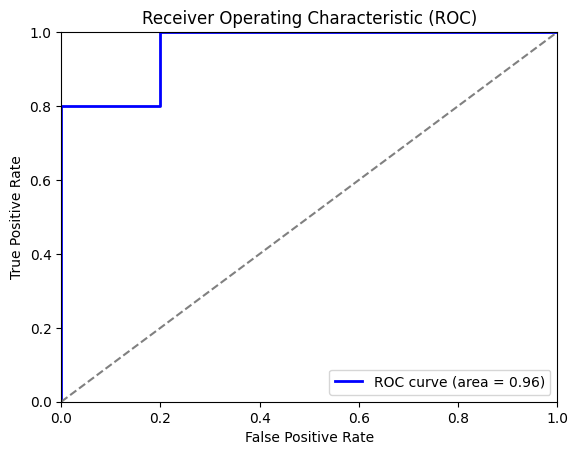

In [25]:
# ROC Curve 그리기
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()